In [55]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib 
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)

import nltk
nltk.download('punkt') 

from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### 2017

In [56]:
# Read in the VAERS DATA2019 dataset
data2017_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2017/2017VAERSDATA.csv"
df_data2017 = pd.read_csv(data2017_file,  encoding='ISO-8859-1')

<ipython-input-56-04553891e545>:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data2017 = pd.read_csv(data2017_file,  encoding='ISO-8859-1')


In [57]:
# create dataframe with DATA2019 dataset
df_data2017 = pd.DataFrame(df_data2017)

In [58]:
# shape of DATA2019 dataframe
df_data2017.shape

(38910, 35)

In [59]:
# Read in the VAERS SYMP2019 dataset
symp2017_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2017/2017VAERSSYMPTOMS.csv"
df_symp2017 = pd.read_csv(symp2017_file,  encoding='ISO-8859-1')

In [60]:
# create dataframe with DATA2019 dataset
df_symp2017 = pd.DataFrame(df_symp2017)

In [61]:
# Read in the VAERS VAX2019 dataset
vax2017_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2017/2017VAERSVAX.csv"
df_vax2017 = pd.read_csv(vax2017_file,  encoding='ISO-8859-1')

In [62]:
# create dataframe with DATA2019 dataset
df_vax2017 = pd.DataFrame(df_vax2017)

In [63]:
# merging all 2017 data
merged2017 = df_data2017.merge(df_symp2017, on='VAERS_ID').merge(df_vax2017, on='VAERS_ID')


In [64]:
merged2017.isna().sum()

VAERS_ID               0
RECVDATE               0
STATE               4280
AGE_YRS            12256
CAGE_YR            14535
CAGE_MO            51685
SEX                    0
RPT_DATE           32711
SYMPTOM_TEXT           0
DIED               62467
DATEDIED           62526
L_THREAT           61613
ER_VISIT           53849
HOSPITAL           58783
HOSPDAYS           59608
X_STAY             62781
DISABLE            61003
RECOVD              3520
VAX_DATE            8572
ONSET_DATE         13168
NUMDAYS            13934
LAB_DATA           40506
V_ADMINBY              0
V_FUNDBY           32000
OTHER_MEDS         29664
CUR_ILL            26067
HISTORY            28988
PRIOR_VAX          59851
SPLTTYPE           43313
FORM_VERS              0
TODAYS_DATE        31079
BIRTH_DEFECT       62812
OFC_VISIT          51358
ER_ED_VISIT        57966
ALLERGIES          44340
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2           11272
SYMPTOMVERSION2    11272
SYMPTOM3           32130


In [65]:
merged2017.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2',
       'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4',
       'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'VAX_TYPE',
       'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE',
       'VAX_NAME'],
      dtype='object')

In [66]:
merged2017 = merged2017.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

In [67]:
# removing all columns with no recorded age 
merged2017.dropna(subset=['AGE_YRS'], inplace=True)

In [68]:
merged2017.shape

(50579, 37)

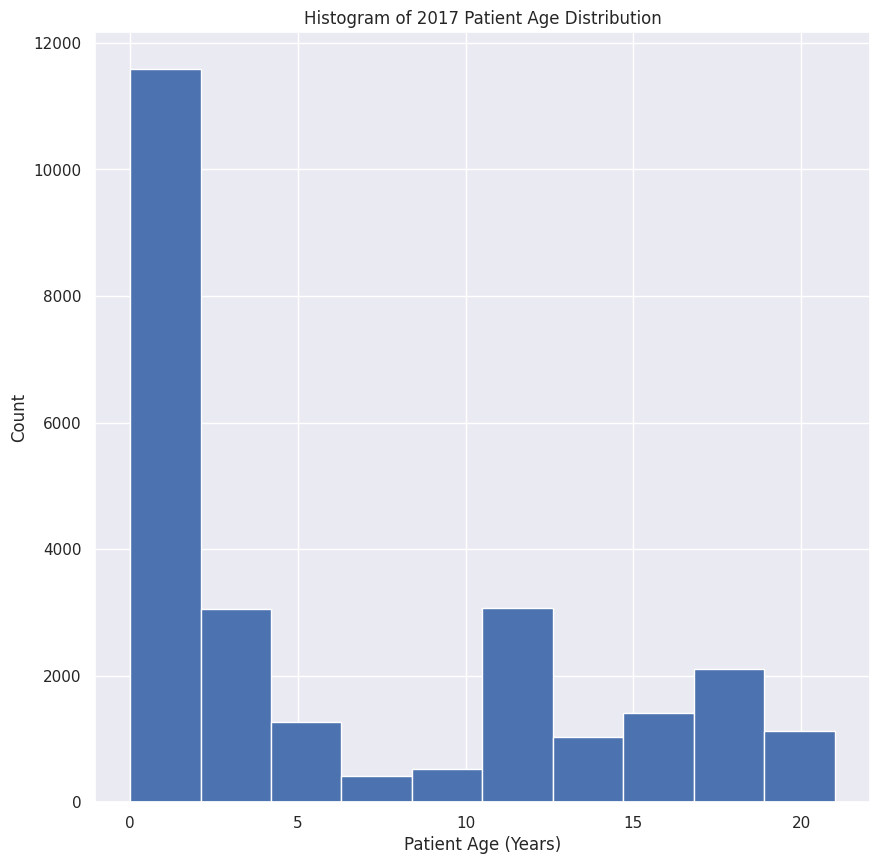

In [101]:
# Perform data visualization
# Histogram
plt.hist(merged2017['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2017 Patient Age Distribution')
plt.show()

In [71]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2017 = merged2017[merged2017['AGE_YRS'] <= 21]

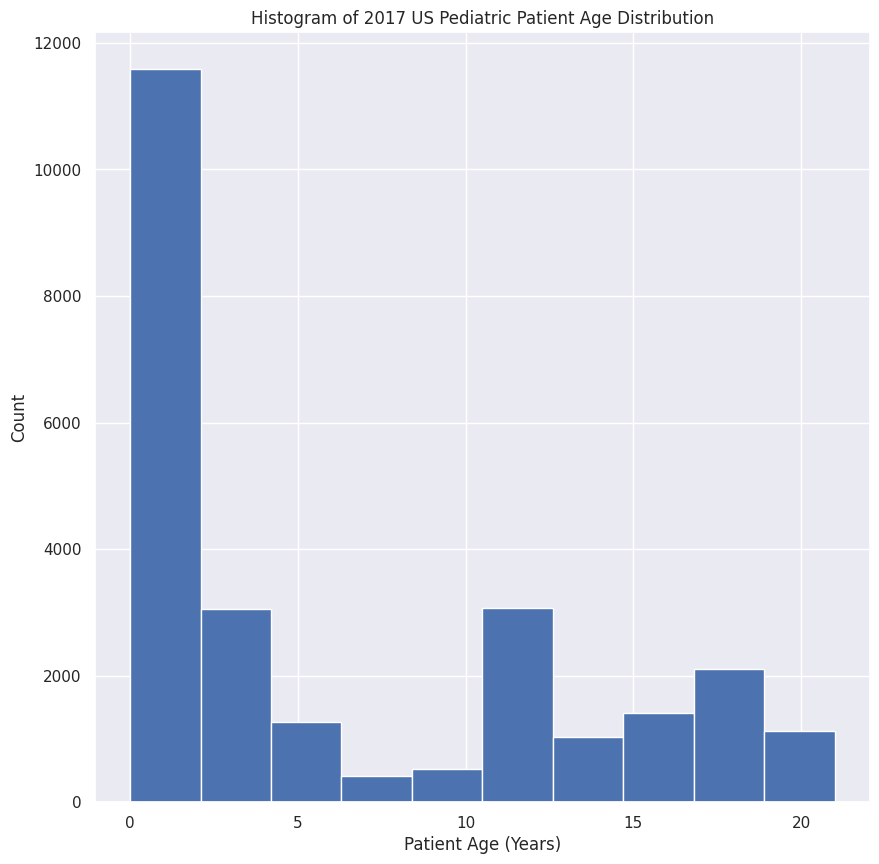

In [73]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2017 = merged2017[merged2017['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2017['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2017 US Pediatric Patient Age Distribution')
plt.show()

In [74]:
merged2017['AGE_YRS'].value_counts()

4.00     2693
1.00     2598
11.00    1889
0.17     1447
0.33     1235
         ... 
0.65        1
1.90        1
0.26        1
0.70        1
2.92        1
Name: AGE_YRS, Length: 64, dtype: int64

In [75]:
merged2017.shape

(25610, 37)

### 2018

In [9]:
# Read in the VAERS DATA2019 dataset
data2018_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2018/2018VAERSDATA.csv"
df_data2018 = pd.read_csv(data2018_file,  encoding='ISO-8859-1')

In [10]:
# create dataframe with DATA2019 dataset
df_data2018 = pd.DataFrame(df_data2018)

In [11]:
# Read in the VAERS SYMP2019 dataset
symp2018_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2018/2018VAERSSYMPTOMS.csv"
df_symp2018 = pd.read_csv(symp2018_file,  encoding='ISO-8859-1')

In [12]:
# create dataframe with DATA2019 dataset
df_symp2018 = pd.DataFrame(df_symp2018)

In [13]:
# Read in the VAERS VAX2019 dataset
vax2018_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2018/2018VAERSVAX.csv"
df_vax2018 = pd.read_csv(vax2018_file,  encoding='ISO-8859-1')

In [14]:
# create dataframe with DATA2019 dataset
df_vax2018 = pd.DataFrame(df_vax2018)

In [78]:
# merging all 2017 data
merged2018 = df_data2018.merge(df_symp2018, on='VAERS_ID').merge(df_vax2018, on='VAERS_ID')


In [79]:
merged2018.shape

(76937, 52)

In [80]:
merged2018.isna().sum()

VAERS_ID               0
RECVDATE               0
STATE               6576
AGE_YRS            14732
CAGE_YR            17991
CAGE_MO            67466
SEX                    0
RPT_DATE           69646
SYMPTOM_TEXT           0
DIED               76558
DATEDIED           76668
L_THREAT           75806
ER_VISIT           75241
HOSPITAL           71493
HOSPDAYS           73148
X_STAY             76913
DISABLE            74832
RECOVD              3761
VAX_DATE           10576
ONSET_DATE         14306
NUMDAYS            15713
LAB_DATA           47423
V_ADMINBY              0
V_FUNDBY           69414
OTHER_MEDS         31255
CUR_ILL            32629
HISTORY            36395
PRIOR_VAX          73282
SPLTTYPE           51557
FORM_VERS              0
TODAYS_DATE         7980
BIRTH_DEFECT       76899
OFC_VISIT          53606
ER_ED_VISIT        66381
ALLERGIES          37721
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2           15002
SYMPTOMVERSION2    15002
SYMPTOM3           34827


In [81]:
merged2018 = merged2018.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

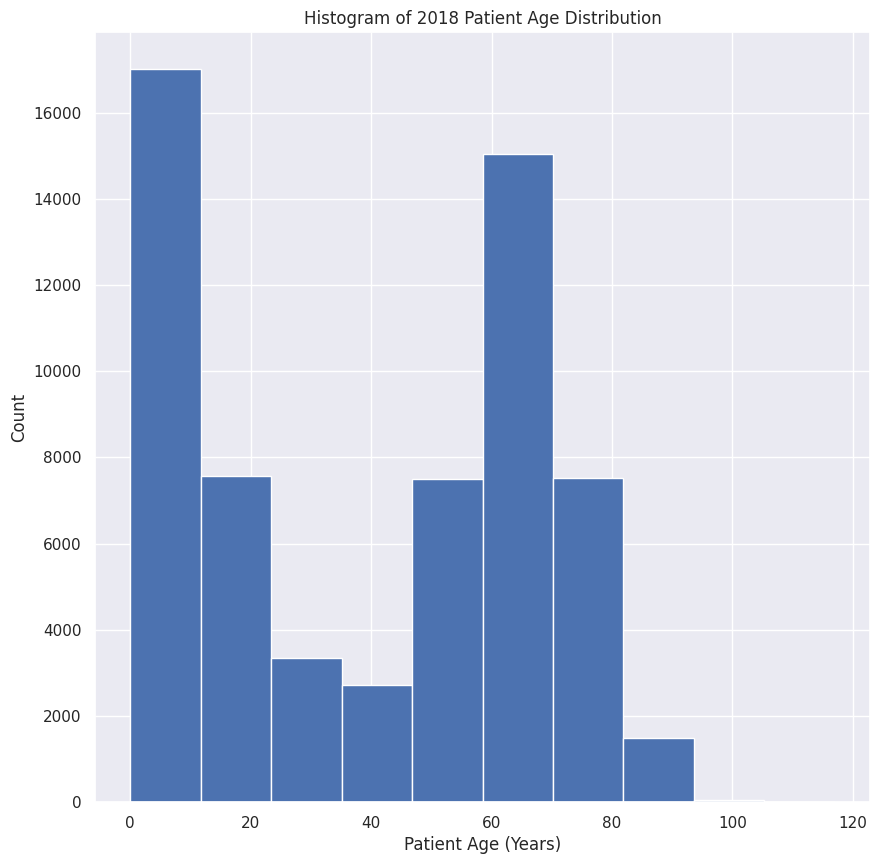

In [102]:
# removing all columns with no recorded age 
merged2018.dropna(subset=['AGE_YRS'], inplace=True)

# Perform data visualization
# Histogram
plt.hist(merged2018['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2018 Patient Age Distribution')
plt.show()

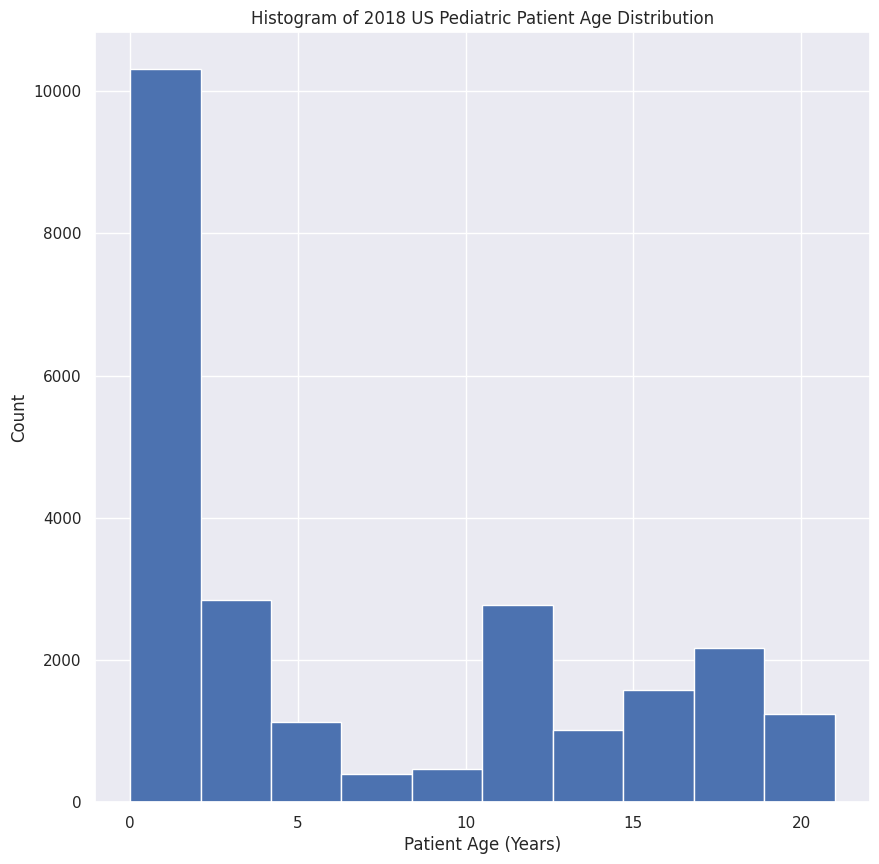

In [103]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2018 = merged2018[merged2018['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2018['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2018 US Pediatric Patient Age Distribution')
plt.show()

In [104]:
merged2018['AGE_YRS'].isna().sum()

0

In [105]:
merged2018.shape

(23917, 37)

### 2019

In [15]:
# Read in the VAERS DATA2019 dataset
data2019_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2019/2019VAERSDATA.csv"
df_data2019 = pd.read_csv(data2019_file,  encoding='ISO-8859-1')

In [16]:
# create dataframe with DATA2019 dataset
df_data2019 = pd.DataFrame(df_data2019)

In [17]:
# Read in the VAERS SYMP2019 dataset
symp2019_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2019/2019VAERSSYMPTOMS.csv"
df_symp2019 = pd.read_csv(symp2019_file,  encoding='ISO-8859-1')

In [18]:
# create dataframe with DATA2019 dataset
df_symp2019 = pd.DataFrame(df_symp2019)

In [19]:
# Read in the VAERS VAX2019 dataset
vax2019_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2019/2019VAERSVAX.csv"
df_vax2019 = pd.read_csv(vax2019_file,  encoding='ISO-8859-1')

In [20]:
# create dataframe with DATA2019 dataset
df_vax2019 = pd.DataFrame(df_vax2019)

In [82]:
# merging all 2017 data
merged2019 = df_data2019.merge(df_symp2019, on='VAERS_ID').merge(df_vax2019, on='VAERS_ID')


In [83]:
merged2019.shape

(76741, 52)

In [84]:
merged2019.isna().sum()

VAERS_ID               0
RECVDATE               0
STATE               5984
AGE_YRS            14756
CAGE_YR            16526
CAGE_MO            66730
SEX                    0
RPT_DATE           73858
SYMPTOM_TEXT          17
DIED               76291
DATEDIED           76449
L_THREAT           75466
ER_VISIT           76107
HOSPITAL           71141
HOSPDAYS           73148
X_STAY             76656
DISABLE            74114
RECOVD              4759
VAX_DATE            8239
ONSET_DATE         12771
NUMDAYS            14923
LAB_DATA           45668
V_ADMINBY              0
V_FUNDBY           73758
OTHER_MEDS         32220
CUR_ILL            35656
HISTORY            35245
PRIOR_VAX          72480
SPLTTYPE           52840
FORM_VERS              0
TODAYS_DATE         3351
BIRTH_DEFECT       76667
OFC_VISIT          54455
ER_ED_VISIT        66383
ALLERGIES          35846
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2           15223
SYMPTOMVERSION2    15223
SYMPTOM3           34410


In [107]:
merged2019 = merged2019.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

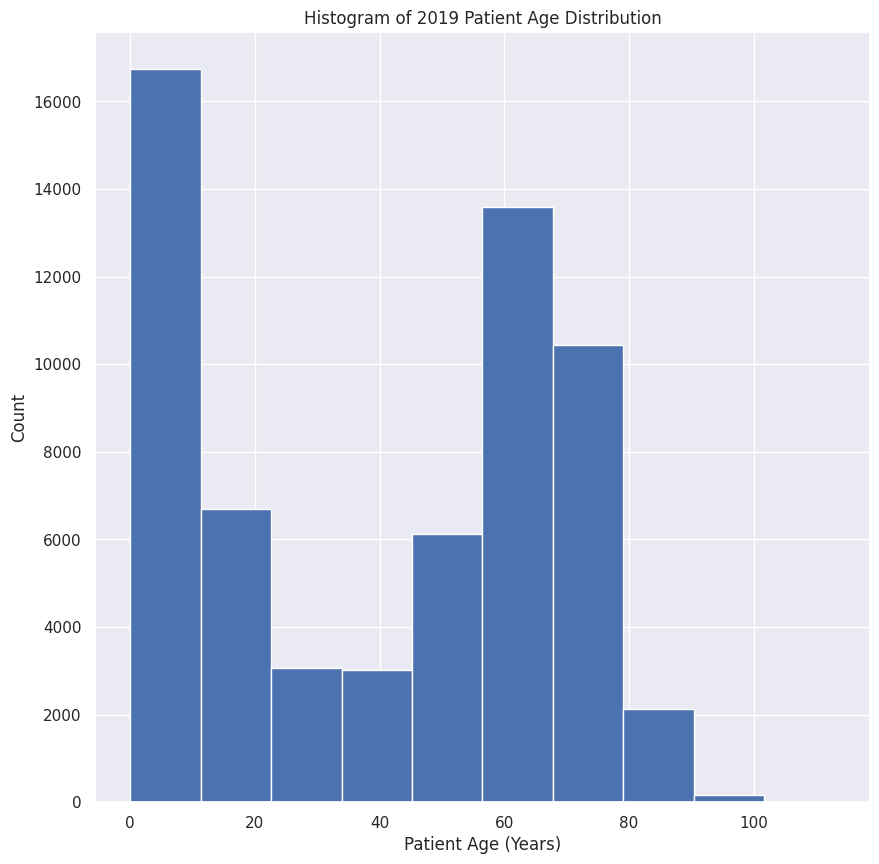

In [112]:
# removing all columns with no recorded age 
merged2019.dropna(subset=['AGE_YRS'], inplace=True)

# Perform data visualization
# Histogram
plt.hist(merged2019['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2019 Patient Age Distribution')
plt.show()

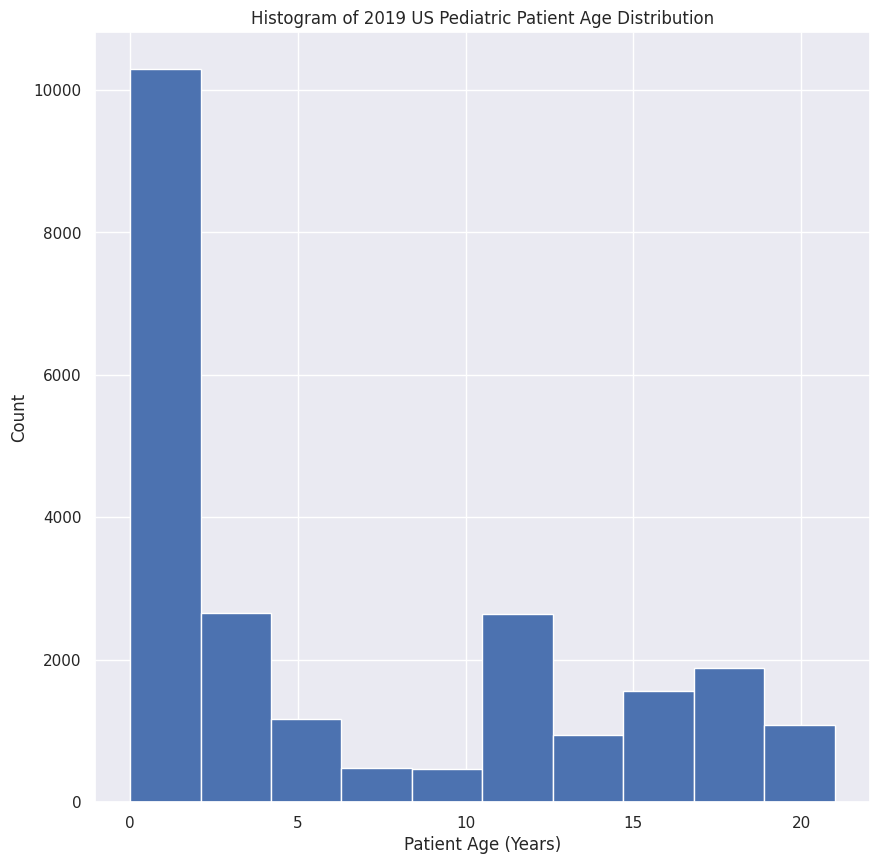

In [113]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2019 = merged2019[merged2019['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2019['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2019 US Pediatric Patient Age Distribution')
plt.show()

In [114]:
merged2019.shape

(23179, 37)

### 2020

In [21]:
# Read in the VAERS DATA2019 dataset
data2020_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2020/2020VAERSDATA.csv"
df_data2020 = pd.read_csv(data2020_file,  encoding='ISO-8859-1')

<ipython-input-21-3bc79f3b22f3>:3: DtypeWarning: Columns (7,9,10,12,15,16,23,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data2020 = pd.read_csv(data2020_file,  encoding='ISO-8859-1')


In [22]:
# create dataframe with DATA2019 dataset
df_data2020 = pd.DataFrame(df_data2020)

In [23]:
# Read in the VAERS SYMP2019 dataset
symp2020_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2020/2020VAERSSYMPTOMS.csv"
df_symp2020 = pd.read_csv(symp2020_file,  encoding='ISO-8859-1')

In [24]:
# create dataframe with DATA2019 dataset
df_symp2020 = pd.DataFrame(df_symp2020)

In [25]:
# Read in the VAERS VAX2019 dataset
vax2020_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2020/2020VAERSVAX.csv"
df_vax2020 = pd.read_csv(vax2020_file,  encoding='ISO-8859-1')

In [26]:
# create dataframe with DATA2019 dataset
df_vax2020 = pd.DataFrame(df_vax2020)

In [85]:
# merging all 2017 data
merged2020 = df_data2020.merge(df_symp2020, on='VAERS_ID').merge(df_vax2020, on='VAERS_ID')


In [86]:
merged2020.shape

(73451, 52)

In [87]:
merged2020.isna().sum()

VAERS_ID               0
RECVDATE               0
STATE               8667
AGE_YRS            14414
CAGE_YR            16301
CAGE_MO            66068
SEX                    0
RPT_DATE           71869
SYMPTOM_TEXT          19
DIED               73041
DATEDIED           73135
L_THREAT           72366
ER_VISIT           73115
HOSPITAL           69389
HOSPDAYS           70999
X_STAY             73321
DISABLE            71461
RECOVD              5225
VAX_DATE            7689
ONSET_DATE         10620
NUMDAYS            13176
LAB_DATA           44147
V_ADMINBY              0
V_FUNDBY           71805
OTHER_MEDS         31247
CUR_ILL            36596
HISTORY            32776
PRIOR_VAX          69442
SPLTTYPE           50688
FORM_VERS              0
TODAYS_DATE         2284
BIRTH_DEFECT       73408
OFC_VISIT          57157
ER_ED_VISIT        64321
ALLERGIES          34517
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2           16858
SYMPTOMVERSION2    16858
SYMPTOM3           34132


In [88]:
merged2020 = merged2020.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

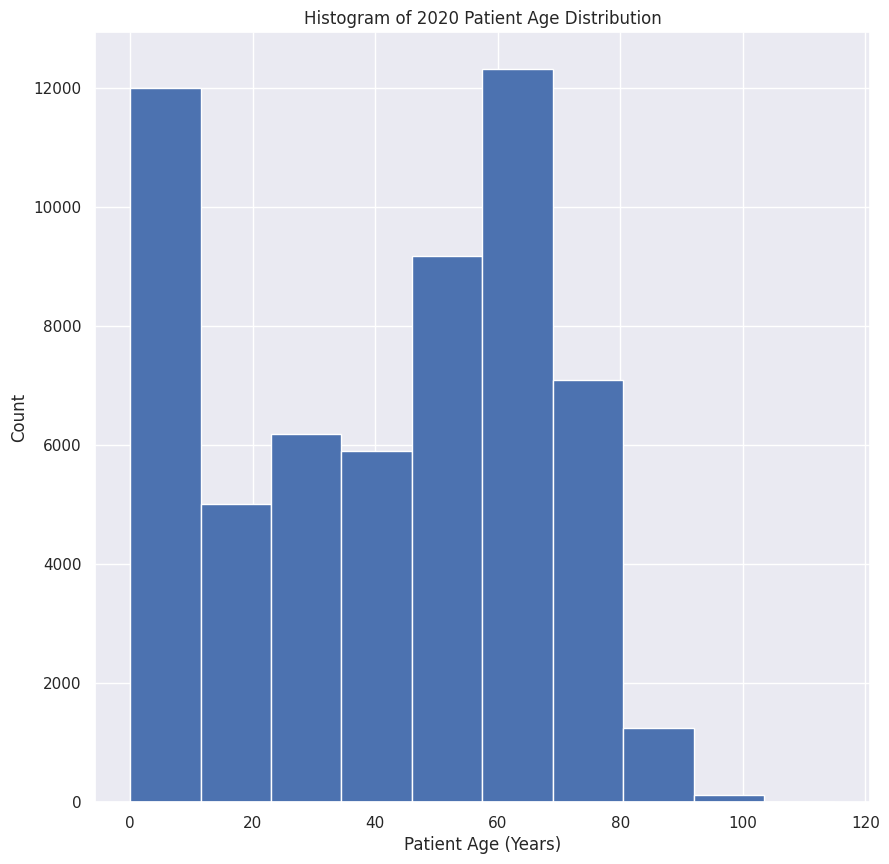

In [115]:
# removing all columns with no recorded age 
merged2020.dropna(subset=['AGE_YRS'], inplace=True)

# Perform data visualization
# Histogram
plt.hist(merged2020['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2020 Patient Age Distribution')
plt.show()


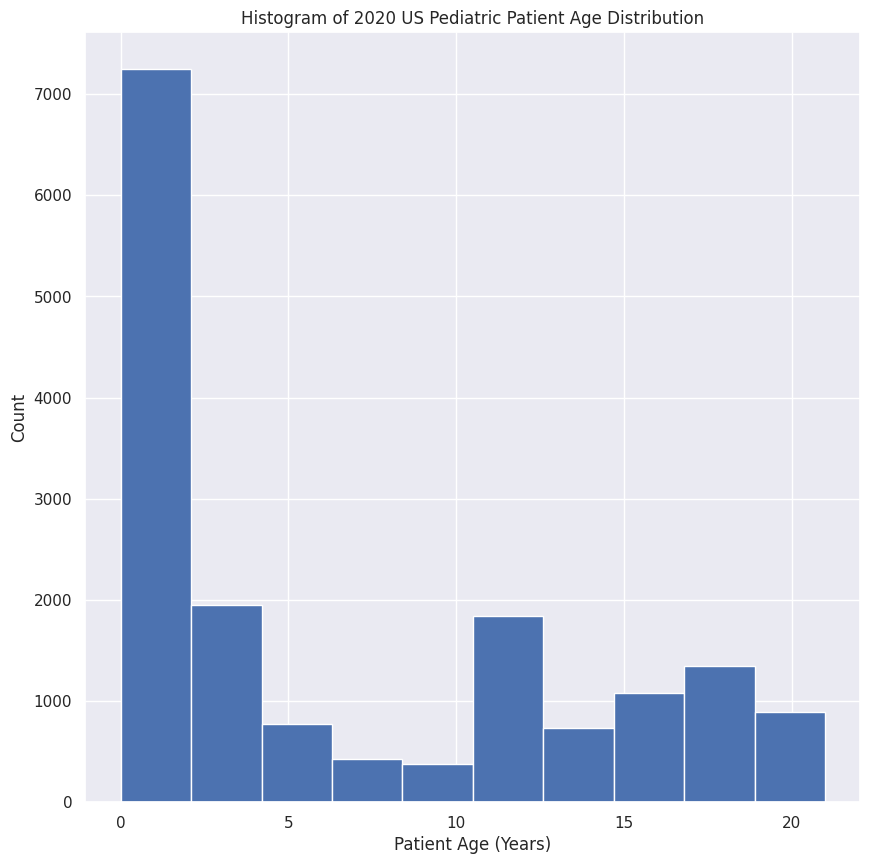

In [116]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2020 = merged2020[merged2020['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2020['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2020 US Pediatric Patient Age Distribution')
plt.show()

In [117]:
merged2020.shape

(16672, 37)

### 2021

In [27]:
# Read in the VAERS DATA2019 dataset
data2021_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2021/2021VAERSDATA.csv"
df_data2021 = pd.read_csv(data2021_file,  encoding='ISO-8859-1')

<ipython-input-27-52d9ae2fb2f9>:3: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data2021 = pd.read_csv(data2021_file,  encoding='ISO-8859-1')


In [28]:
# create dataframe with DATA2019 dataset
df_data2021 = pd.DataFrame(df_data2021)

In [29]:
# Read in the VAERS SYMP2019 dataset
symp2021_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2021/2021VAERSSYMPTOMS.csv"
df_symp2021 = pd.read_csv(symp2021_file,  encoding='ISO-8859-1')

In [30]:
# create dataframe with DATA2019 dataset
df_symp2021 = pd.DataFrame(df_symp2021)

In [31]:
# Read in the VAERS VAX2019 dataset
vax2021_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2021/2021VAERSVAX.csv"
df_vax2021 = pd.read_csv(vax2021_file,  encoding='ISO-8859-1')

In [32]:
# create dataframe with DATA2019 dataset
df_vax2021 = pd.DataFrame(df_vax2021)

In [89]:
# merging all 2017 data
merged2021 = df_data2021.merge(df_symp2021, on='VAERS_ID').merge(df_vax2021, on='VAERS_ID')


In [90]:
merged2021.shape

(1060146, 52)

In [91]:
merged2021.isna().sum()

VAERS_ID                 0
RECVDATE                 0
STATE               136196
AGE_YRS              95035
CAGE_YR             189946
CAGE_MO            1052002
SEX                      0
RPT_DATE           1059020
SYMPTOM_TEXT           319
DIED               1039753
DATEDIED           1041401
L_THREAT           1033908
ER_VISIT           1059950
HOSPITAL            947427
HOSPDAYS            980061
X_STAY             1059375
DISABLE            1032969
RECOVD               91691
VAX_DATE             67399
ONSET_DATE           77964
NUMDAYS             118396
LAB_DATA            578487
V_ADMINBY                0
V_FUNDBY           1058929
OTHER_MEDS          417801
CUR_ILL             550300
HISTORY             384648
PRIOR_VAX          1001731
SPLTTYPE            769568
FORM_VERS                0
TODAYS_DATE           9019
BIRTH_DEFECT       1059240
OFC_VISIT           815353
ER_ED_VISIT         886678
ALLERGIES           489756
SYMPTOM1                 0
SYMPTOMVERSION1          0
S

In [92]:
merged2021 = merged2021.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

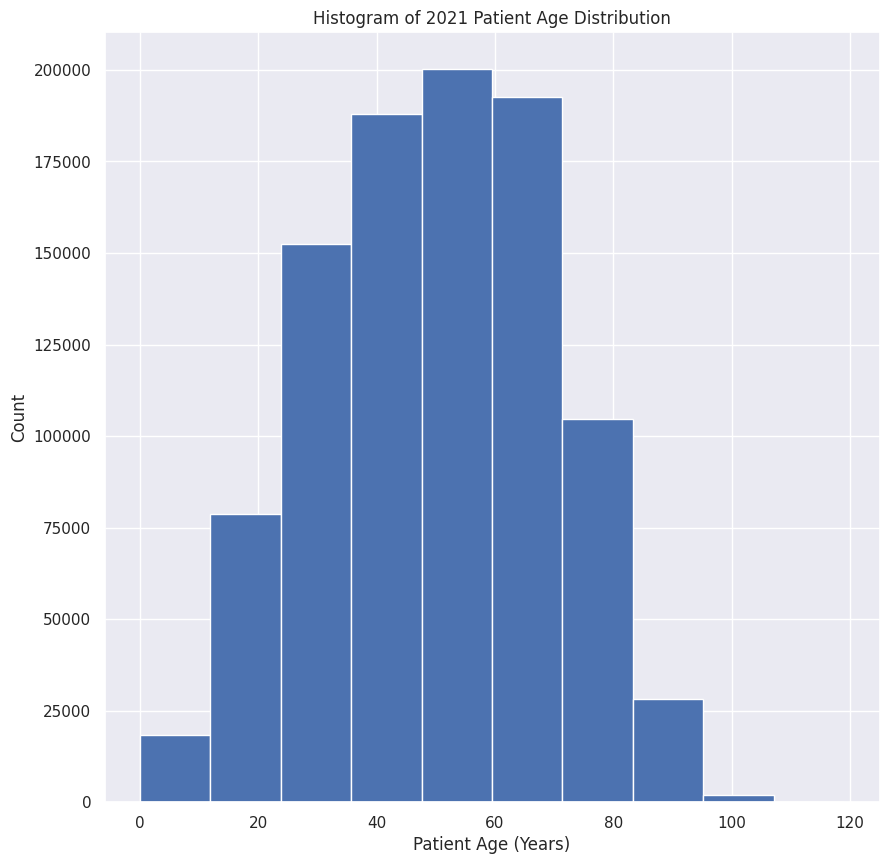

In [118]:
# removing all columns with no recorded age 
merged2021.dropna(subset=['AGE_YRS'], inplace=True)

# Perform data visualization
# Histogram
plt.hist(merged2021['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2021 Patient Age Distribution')
plt.show()


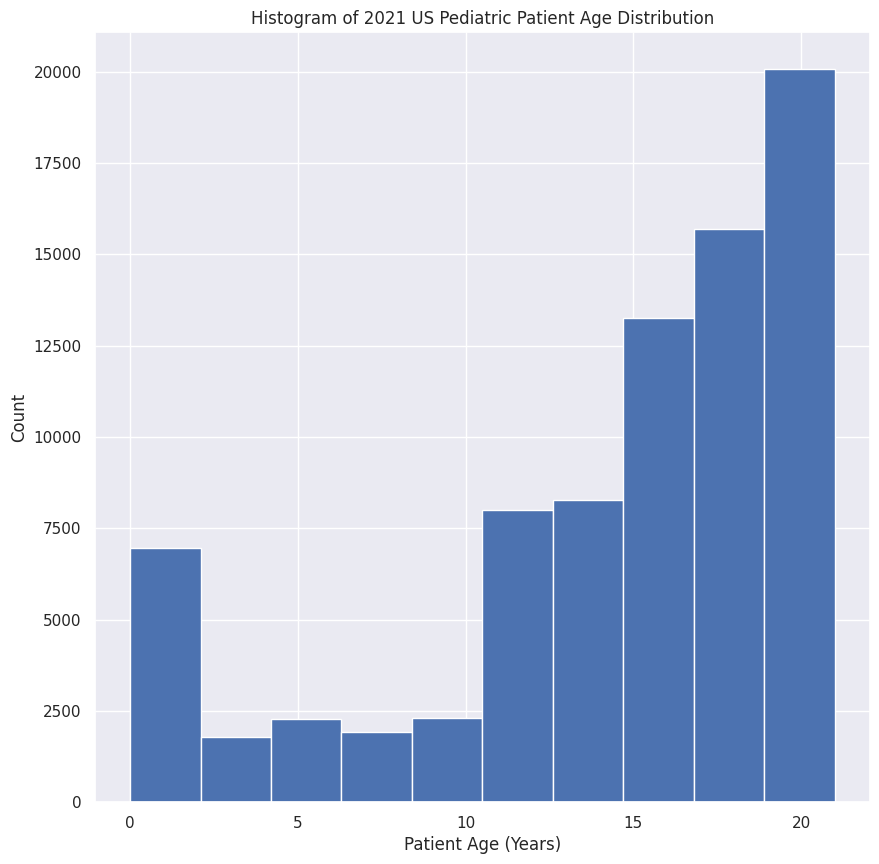

In [119]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2021 = merged2021[merged2021['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2021['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2021 US Pediatric Patient Age Distribution')
plt.show()

In [120]:
merged2021.shape

(80579, 37)

### 2022

In [33]:
# Read in the VAERS DATA2019 dataset
data2022_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2022/2022VAERSDATA.csv"
df_data2022 = pd.read_csv(data2022_file,  encoding='ISO-8859-1')

<ipython-input-33-9f035b560287>:3: DtypeWarning: Columns (7,12,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data2022 = pd.read_csv(data2022_file,  encoding='ISO-8859-1')


In [34]:
# create dataframe with DATA2019 dataset
df_data2022 = pd.DataFrame(df_data2022)

In [35]:
# Read in the VAERS SYMP2019 dataset
symp2022_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2022/2022VAERSSYMPTOMS.csv"
df_symp2022 = pd.read_csv(symp2022_file,  encoding='ISO-8859-1')

In [36]:
# create dataframe with DATA2019 dataset
df_symp2022 = pd.DataFrame(df_symp2022)

In [37]:
# Read in the VAERS VAX2019 dataset
vax2022_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2022/2022VAERSVAX.csv"
df_vax2022 = pd.read_csv(vax2022_file,  encoding='ISO-8859-1')

In [38]:
# create dataframe with DATA2019 dataset
df_vax2022 = pd.DataFrame(df_vax2022)

In [93]:
# merging all 2017 data
merged2022 = df_data2022.merge(df_symp2022, on='VAERS_ID').merge(df_vax2022, on='VAERS_ID')


In [94]:
merged2022.shape

(385416, 52)

In [95]:
merged2022.isna().sum()

VAERS_ID                0
RECVDATE                0
STATE               66582
AGE_YRS             44156
CAGE_YR             80386
CAGE_MO            377175
SEX                     0
RPT_DATE           385219
SYMPTOM_TEXT          472
DIED               368507
DATEDIED           369714
L_THREAT           375941
ER_VISIT           385375
HOSPITAL           304422
HOSPDAYS           329459
X_STAY             385179
DISABLE            370232
RECOVD              61840
VAX_DATE            34237
ONSET_DATE          48287
NUMDAYS             63429
LAB_DATA           204816
V_ADMINBY               0
V_FUNDBY           385206
OTHER_MEDS         195232
CUR_ILL            237641
HISTORY            175090
PRIOR_VAX          365023
SPLTTYPE           245951
FORM_VERS               0
TODAYS_DATE          8594
BIRTH_DEFECT       385101
OFC_VISIT          286977
ER_ED_VISIT        320716
ALLERGIES          214240
SYMPTOM1                0
SYMPTOMVERSION1         0
SYMPTOM2            96907
SYMPTOMVERSI

In [96]:
merged2022 = merged2022.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

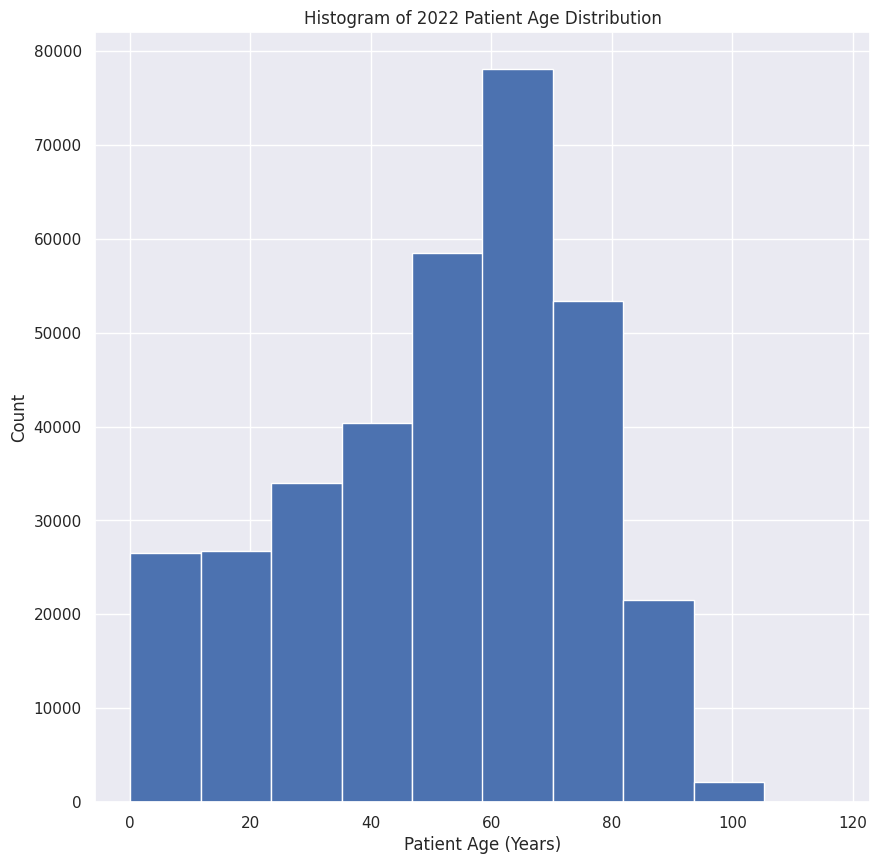

In [121]:
# removing all columns with no recorded age 
merged2022.dropna(subset=['AGE_YRS'], inplace=True)

# Perform data visualization
# Histogram
plt.hist(merged2022['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2022 Patient Age Distribution')
plt.show()


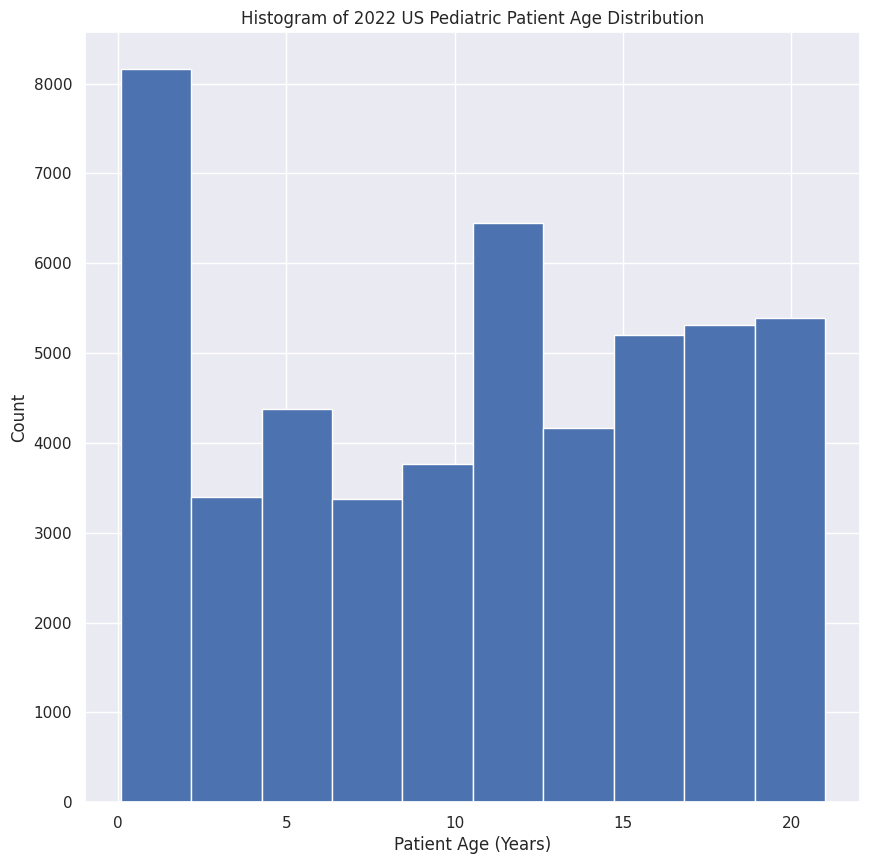

In [122]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2022 = merged2022[merged2022['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2022['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2022 US Pediatric Patient Age Distribution')
plt.show()

In [123]:
merged2022.shape

(49583, 37)

### 2023

In [39]:
# Read in the VAERS DATA2019 dataset
data2023_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2023/2023VAERSDATA.csv"
df_data2023 = pd.read_csv(data2023_file,  encoding='ISO-8859-1')

In [40]:
# create dataframe with DATA2019 dataset
df_data2023 = pd.DataFrame(df_data2023)

In [41]:
# Read in the VAERS SYMP2019 dataset
symp2023_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2023/2023VAERSSYMPTOMS.csv"
df_symp2023 = pd.read_csv(symp2023_file,  encoding='ISO-8859-1')

In [42]:
# create dataframe with DATA2019 dataset
df_symp2023 = pd.DataFrame(df_symp2023)

In [43]:
# Read in the VAERS VAX2019 dataset
vax2023_file = "/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/VAERS2023/2023VAERSVAX.csv"
df_vax2023 = pd.read_csv(vax2023_file,  encoding='ISO-8859-1')

In [76]:
# create dataframe with DATA2019 dataset
df_vax2023 = pd.DataFrame(df_vax2023)

In [97]:
# merging all 2017 data
merged2023 = df_data2023.merge(df_symp2023, on='VAERS_ID').merge(df_vax2023, on='VAERS_ID')


In [98]:
merged2023.shape

(79098, 52)

In [99]:
merged2023.isna().sum()

VAERS_ID               0
RECVDATE               0
STATE              14261
AGE_YRS            10182
CAGE_YR            15304
CAGE_MO            75196
SEX                    0
RPT_DATE           79017
SYMPTOM_TEXT         102
DIED               76765
DATEDIED           76997
L_THREAT           76958
ER_VISIT           79075
HOSPITAL           61228
HOSPDAYS           68746
X_STAY             79032
DISABLE            75257
RECOVD             13580
VAX_DATE            7609
ONSET_DATE         10072
NUMDAYS            13134
LAB_DATA           41488
V_ADMINBY              0
V_FUNDBY           79004
OTHER_MEDS         40760
CUR_ILL            50997
HISTORY            37437
PRIOR_VAX          75378
SPLTTYPE           45967
FORM_VERS              0
TODAYS_DATE         1198
BIRTH_DEFECT       79036
OFC_VISIT          54161
ER_ED_VISIT        66716
ALLERGIES          44172
SYMPTOM1               0
SYMPTOMVERSION1        0
SYMPTOM2           20187
SYMPTOMVERSION2    20187
SYMPTOM3           36076


In [100]:
merged2023 = merged2023.drop(columns = ['CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DATEDIED', 'VAX_DATE', 'ONSET_DATE', 'V_ADMINBY', 'V_FUNDBY', 'FORM_VERS', 'TODAYS_DATE', 'SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'])

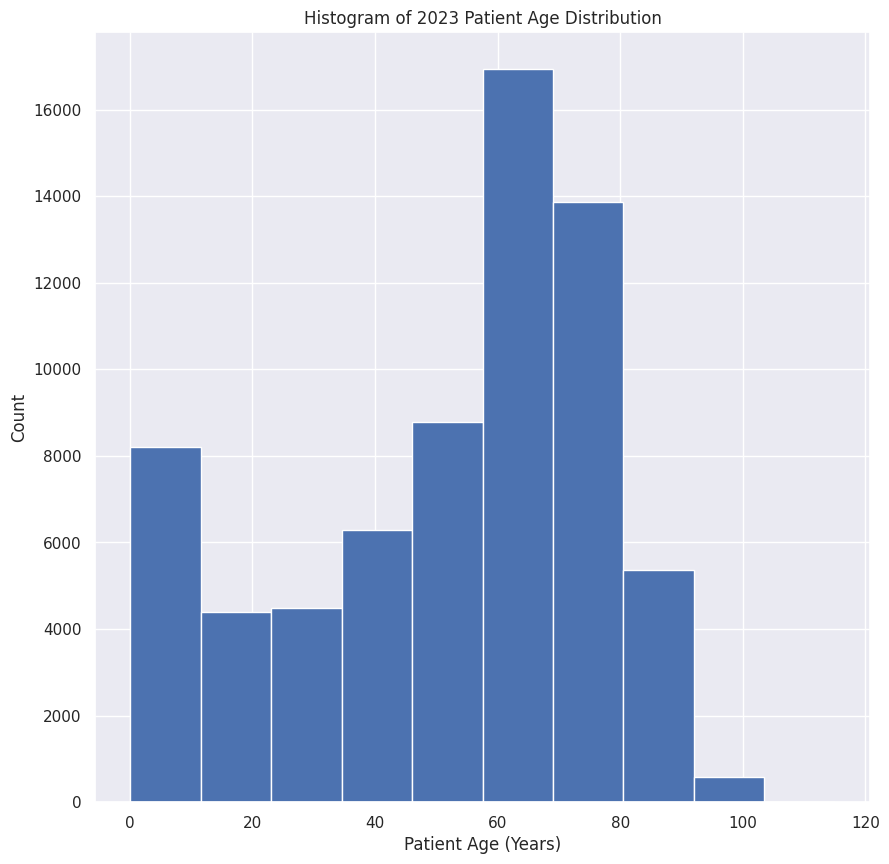

In [124]:
# removing all columns with no recorded age 
merged2023.dropna(subset=['AGE_YRS'], inplace=True)

# Perform data visualization
# Histogram
plt.hist(merged2023['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2023 Patient Age Distribution')
plt.show()

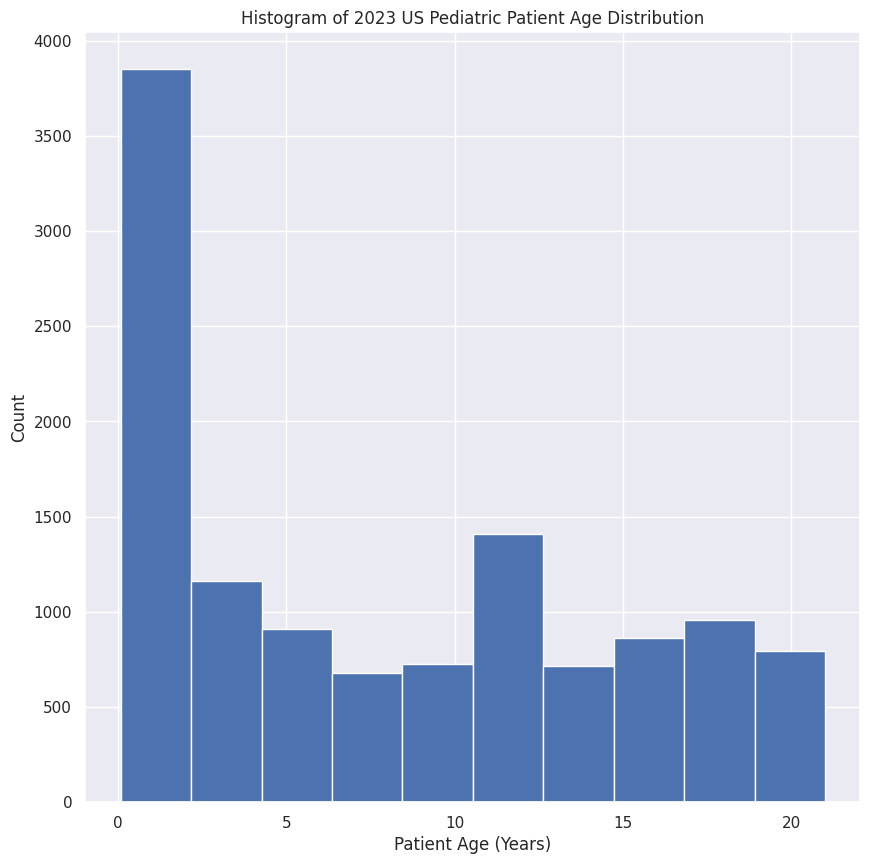

In [125]:
# Select only pediatric patients by dropping rows with age > 21 in 'AGE_YRS' column
merged2023 = merged2023[merged2023['AGE_YRS'] <= 21]

# Perform data visualization
# Histogram
plt.hist(merged2023['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of 2023 US Pediatric Patient Age Distribution')
plt.show()

In [126]:
merged2023.shape

(12078, 37)

### Merging Years 2017-2023 

Merging 2017-2023 into one csv for further data pre-processing

In [131]:
# List of DataFrame variables
dfs = [merged2017, merged2018, merged2019, merged2020, merged2021, merged2022, merged2023]

# Merge all DataFrames
merged_df = pd.concat(dfs)

# Print the merged DataFrame
merged_df.shape

(231618, 37)

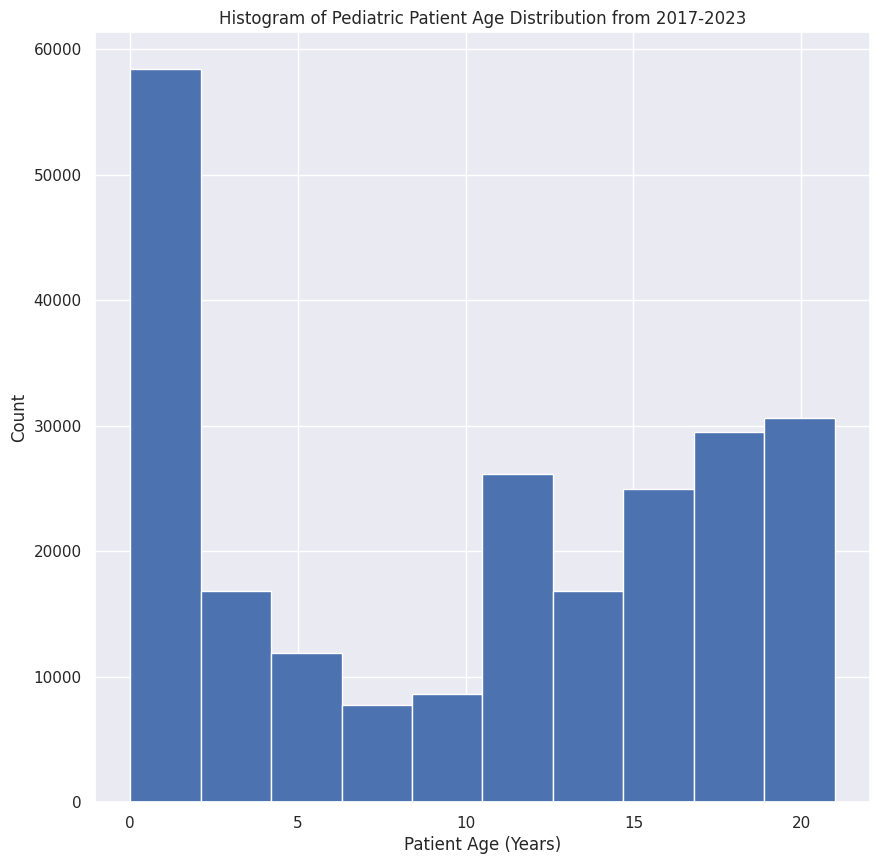

In [132]:
# Perform data visualization
# Histogram
plt.hist(merged_df['AGE_YRS'])
plt.xlabel('Patient Age (Years)')
plt.ylabel('Count')

plt.title('Histogram of Pediatric Patient Age Distribution from 2017-2023')
plt.show()

In [133]:
merged_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,L_THREAT,ER_VISIT,HOSPITAL,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,676017,01/01/2017,GA,1.50,M,"After getting Hep A vaccination on 12/20, went...",NaN,NaN,Y,Y,...,Aspiration joint,Bacterial infection,Bacterial test positive,HEPA,MERCK & CO. INC.,M032492,2,IM,LL,HEP A (VAQTA)
1,676017,01/01/2017,GA,1.50,M,"After getting Hep A vaccination on 12/20, went...",NaN,NaN,Y,Y,...,Gait disturbance,Injection site swelling,Red blood cell sedimentation rate,HEPA,MERCK & CO. INC.,M032492,2,IM,LL,HEP A (VAQTA)
2,676017,01/01/2017,GA,1.50,M,"After getting Hep A vaccination on 12/20, went...",NaN,NaN,Y,Y,...,X-ray,NaN,NaN,HEPA,MERCK & CO. INC.,M032492,2,IM,LL,HEP A (VAQTA)
14,676024,01/01/2017,NY,1.58,F,Brought her to Dr's office for respiratory ill...,NaN,Y,Y,Y,...,Bronchoscopy,Cardiac failure,Computerised tomogram,HEPA,GLAXOSMITHKLINE BIOLOGICALS,59n59,1,IM,RL,HEP A (HAVRIX)
15,676024,01/01/2017,NY,1.58,F,Brought her to Dr's office for respiratory ill...,NaN,Y,Y,Y,...,Bronchoscopy,Cardiac failure,Computerised tomogram,MMR,MERCK & CO. INC.,k002527,1,IM,LL,MEASLES + MUMPS + RUBELLA (MMR II)


In [134]:
merged_df.isna().sum()

VAERS_ID                0
RECVDATE                0
STATE               16168
AGE_YRS                 0
SEX                     0
SYMPTOM_TEXT          372
DIED               230181
L_THREAT           226336
ER_VISIT           225336
HOSPITAL           210107
HOSPDAYS           214480
X_STAY             231422
DISABLE            224885
RECOVD              29293
NUMDAYS             16835
LAB_DATA           128256
OTHER_MEDS          98758
CUR_ILL            102904
HISTORY             98366
PRIOR_VAX          221788
SPLTTYPE           194529
BIRTH_DEFECT       231435
OFC_VISIT          172338
ER_ED_VISIT        193986
ALLERGIES          107755
SYMPTOM1                0
SYMPTOM2            67789
SYMPTOM3           125506
SYMPTOM4           155820
SYMPTOM5           176299
VAX_TYPE                0
VAX_MANU                0
VAX_LOT             49868
VAX_DOSE_SERIES      3226
VAX_ROUTE           35381
VAX_SITE            43545
VAX_NAME                0
dtype: int64

In [135]:
# Specify the file path and name
file_path = '/content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/merged_2017-2023data.csv'

# Save the DataFrame to CSV
merged_df.to_csv(file_path, index=False)

# Confirmation message
print(f"DataFrame saved to {file_path}")

DataFrame saved to /content/drive/MyDrive/JoelleFitzgerald_Capstone2023/data/merged_2017-2023data.csv
